# Filtering by keys in Catalog
`Catalog` is a class with a `.table` argument, which is always a dataframe. This means, that in order to filter out the catalog we can use any filter function available in pandas. Lets first load the table.


In [1]:
import os
os.chdir('../')

from PTO.database.NASA_exoplanet_archive import NASA_Exoplanet_Archive_CompositeDefault

Catalog = NASA_Exoplanet_Archive_CompositeDefault()
Catalog.load_API_table(force_load=True)

  INFO     | Forced reload:
  INFO     | Accessing NASA Exoplanet Archive
  INFO     | Fetching table
  INFO     | Table fetched successfully
  WARNING  |     Droping all values without errorbars. To instead replace the errorbars with 0 change Catalogs "drop_mode" key to "replace"
  INFO     | Converting Earth and Jupiter Radius units in the catalog
  INFO     | Checking for inclination and impact parameters values
  INFO     | Calculation of T_14 and related values
  INFO     | File saved succesfully in:
  INFO     |     /media/chamaeleontis/Observatory_main/Code/observations_transits/PTO/saved_files/CatalogComposite.pkl


## Filtering
Now we can use the `Catalog` class to access the `.table` atribute and work on it. 
For example, to filter out stars with magnitude in V band less than 13:


In [2]:
print(f"Unfiltered length of table: {Catalog.table.shape[0]}")
Catalog.table = Catalog.table[Catalog.table['Magnitude.V'] < 13]
print(f"Filtered length of table: {Catalog.table.shape[0]}")

Unfiltered length of table: 5780
Filtered length of table: 2506


This is the simplest way to filter a table. Other methods will be added. This will not affect the population plots, as the class holds the full infiltered data within a different argument (`legacy_table`), which is used for the plot. We can also reset the table to the full unfiltered sample this way.

In fact, we can highlight the full sample in the population plot. Lets preselect little more before highlighting the sample.

In [3]:
print(f"Length before further filtering of the table: {Catalog.table.shape[0]}")
Catalog.table = Catalog.table[Catalog.table['Magnitude.V'] < 10]
Catalog.table = Catalog.table[Catalog.table['Planet.RadiusEarth'] > 3]
Catalog.table = Catalog.table[Catalog.table['Planet.RadiusEarth'] < 8]
Catalog.table = Catalog.table[Catalog.table['Planet.Period'] < 30]
print(f"Length after further filtering of the table: {Catalog.table.shape[0]}")

Length before further filtering of the table: 2506
Length after further filtering of the table: 31


(0.1, 50)

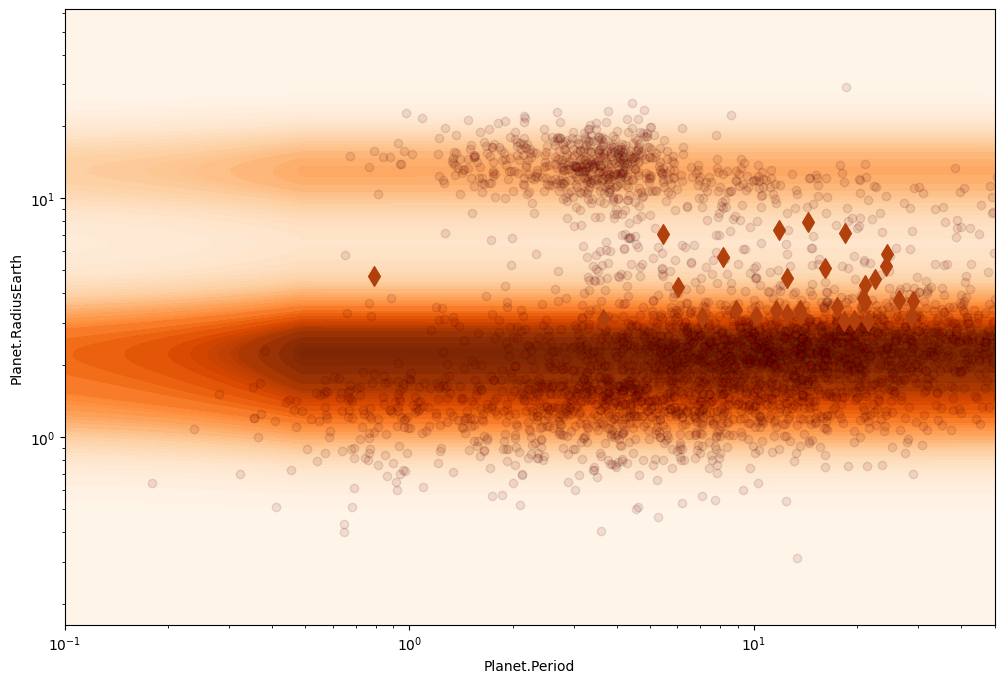

In [7]:
fig, ax = Catalog.highlight_sample(
    x_key= 'Planet.Period',
    y_key= 'Planet.RadiusEarth',
    marker= 'd'
)

ax.set_xlim(0.1,50)